In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [262]:
df = pd.read_csv("datasetnew3.csv")

In [263]:
df.head

<bound method NDFrame.head of              id                       Model  Year     Company    Price Engine  \
0     200716453            Honda N Box 2018  2018       Honda  3400000   1310   
1     200716455     Honda N WGN Custom 2018  2018       Honda  3800000    658   
2     200716452       Honda S660 Alpha 2017  2017       Honda  3900000    658   
3     200701070  Honda Fit GP5 S Grade 2018  2018       Honda  6200000   1496   
4     200716458       Honda Fit GP5 DX 2018  2018       Honda  6700000   1496   
...         ...                         ...   ...         ...      ...    ...   
1276  200705595                         CK1  1999  Mitsubishi   800000   1200   
1277  200481163                         CB1  1994  Mitsubishi  1280000   1500   
1278  200677384                 Pajero Mini  1999  Mitsubishi  2650000   1500   
1279  200693702                      petrol  2007  Mitsubishi  8100000   4000   
1280  200693703                  CS1 Saloon  2004  Mitsubishi  1925000   1200  

Text(0, 0.5, 'Price')

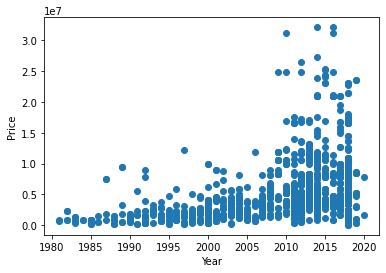

In [264]:
plt.scatter(df['Year'], df['Price'])
plt.xlabel("Year")
plt.ylabel("Price")

In [265]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine          object
FuelType        object
Transmission    object
Age              int64
dtype: object

In [266]:
df["Transmission"] = df["Transmission"].astype(str)

In [267]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine          object
FuelType        object
Transmission    object
Age              int64
dtype: object

In [268]:
df = df.astype({"Engine": int})

In [246]:
df = df.astype({"Age": int})

Text(0, 0.5, 'Price')

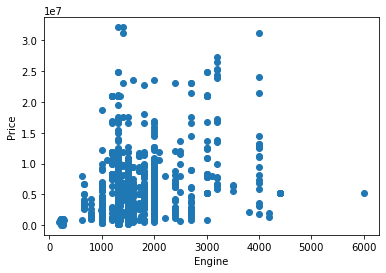

In [269]:
plt.scatter(df['Engine'], df['Price'])
plt.xlabel("Engine")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

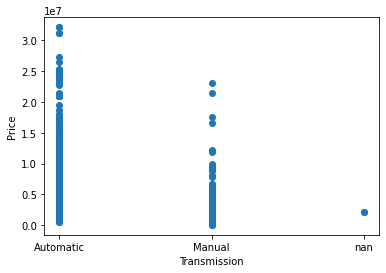

In [270]:
plt.scatter(df['Transmission'], df['Price'])
plt.xlabel("Transmission")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

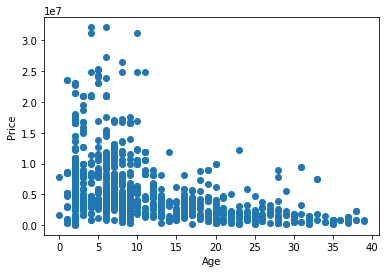

In [271]:
plt.scatter(df['Age'], df['Price'])
plt.xlabel("Age")
plt.ylabel("Price")

In [272]:
df["FuelType"] = df["FuelType"].astype(str)

Text(0, 0.5, 'Price')

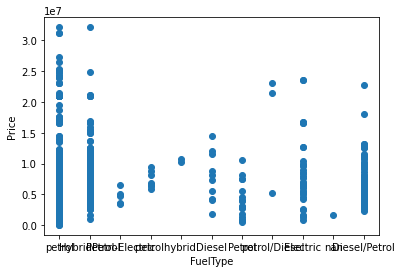

In [273]:
plt.scatter(df['FuelType'], df['Price'])
plt.xlabel("FuelType")
plt.ylabel("Price")

In [274]:
transmission_types = [x for x in df['Transmission'].unique().tolist()]
print(transmission_types)
fuel_types = [x for x in df['FuelType'].unique().tolist()]
print(fuel_types)
tmission_number = 0

for tmission in transmission_types:
  df['Transmission'] = df['Transmission'].replace({str(tmission): str(tmission_number)})
  tmission_number += 1
ftype_number = 0
for ftype in fuel_types:
  df['FuelType'] = df['FuelType'].replace({str(ftype): str(ftype_number)})
  ftype_number += 1
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].fillna(method='ffill')
df['FuelType'] = df['FuelType'].fillna(method='ffill')
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].astype(float).astype(int)
df['FuelType'] = df['FuelType'].astype(float).astype(int)
print(df.dtypes)
print(df['FuelType'].head)
print(df['Transmission'].head)

['Automatic', 'Manual', 'nan']
['petrol', 'HybridPetrol', 'Petrol-Electric', 'petrol ', 'hybrid ', 'Diesel', 'Petrol', 'petrol/Diesel', 'Electric', 'nan', 'Diesel/Petrol']
0
0
0
0
id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int32
FuelType         int32
Transmission     int32
Age              int64
dtype: object
<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       1
       ..
1276    0
1277    0
1278    0
1279    0
1280    0
Name: FuelType, Length: 1281, dtype: int32>
<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       0
       ..
1276    0
1277    0
1278    0
1279    0
1280    0
Name: Transmission, Length: 1281, dtype: int32>


In [275]:
X = df[['Year','Engine','FuelType','Age','Transmission']]
y = df['Price']

In [276]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [277]:
print(X_train) 

      Year  Engine  FuelType  Age  Transmission
995   2020    1500         0    0             0
153   1984    1323         0   36             1
565   2004    1500         0    6             1
1172  2018    1500         0    2             0
403   2018    3000         0    2             1
...    ...     ...       ...  ...           ...
110   2018    1400         7    2             1
630   2018    1600         0    2             0
1031  1992    1300         0   28             1
463   2018    2000         0    2             0
344   1994    1350         0   26             1

[1024 rows x 5 columns]


In [256]:
print(X_test)

      Year  Engine  FuelType  Age  Transmission
529   2018    2000         1    2             0
976   2007    1300         0   13             1
893   2018    1000         0    2             0
237   2017    1200         1    3             0
1076  2004     800         0   16             1
...    ...     ...       ...  ...           ...
60    2014    1496         1    6             0
34    2013    1496         1    7             0
73    2012    1496         0    8             0
631   2011    1500         0    9             0
1096  2005    1000         0   15             1

[262 rows x 5 columns]


In [278]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [279]:
clf.predict(X_test)

array([ 6848474.34500194,  7334780.09284979,  6686423.9991824 ,
        7011888.01395369,  7334780.09284979,  6006357.85198319,
        2929607.43625116,  6194819.66919506,  6293567.9827981 ,
        7869936.88893288,  2478983.63648444,  2204979.24136567,
        7358062.04706353,  1336093.20980299,  1295470.74673396,
        6521647.0070985 ,  6384644.80953914,  3622879.31914645,
        6456981.65174985,  6453734.63411033,  6704407.37125665,
        2275952.76044428,  6437833.50469667,  6384644.80953914,
        7732934.69137347,  6823426.19674176,  6986839.86569351,
        7340078.67498928,  9172301.39994884, 11101909.11537939,
        2602780.09834772, 11265322.78433108,  1909508.21545231,
        7365126.82324946,  6350765.69104654, 10014417.89296764,
        2563162.89125919,  5064455.47944862,  6986839.86569351,
        7340078.67498928,  4737628.14154518,  6006357.85198319,
        8120418.37153476, 11265322.78433108,  6823426.19674176,
       10748670.30608362,  2478983.63648

In [280]:
print(y_test)

222      8275000
17       6950000
613      6000000
251     12164555
306      9850000
          ...   
280     16800000
1221    17000000
418      7800000
292      5490000
1002     2475000
Name: Price, Length: 257, dtype: int64


In [286]:
print(clf.score(X_test, y_test))

0.27664102823223957
